Movie Recommendation System# **Title of Project**

-------------

## **Objective**

Recommender System is a system that seeks to predict or filter preferences according to the user's choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general Recommender systems produce a list of recommendations in any of the two ways-

Collaborative filtering. Collaborative filtering approaches build a model from the user's past behavior (Le lema purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for itema) that users may have an Interest in.

Content-based filtering: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are Intally based on a description of the item and a profile of the user's preferences it recommends items based on the user's past preferences. Let's develop a basic recommendation system using Python and Pandas.

Let's develop a basic recommendation system by suggesting items that are most similar to a particular item, in this case, mories. It just tells what movies/items are most similar to the user's movie choice.

## **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/Movies%20Recommendation.csv

## **Import Library**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer



## **Import Data**

In [22]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Movies%20Recommendation.csv')

## **Describe Data**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [26]:
df.shape

(4760, 21)

In [27]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

## **Data Visualization**

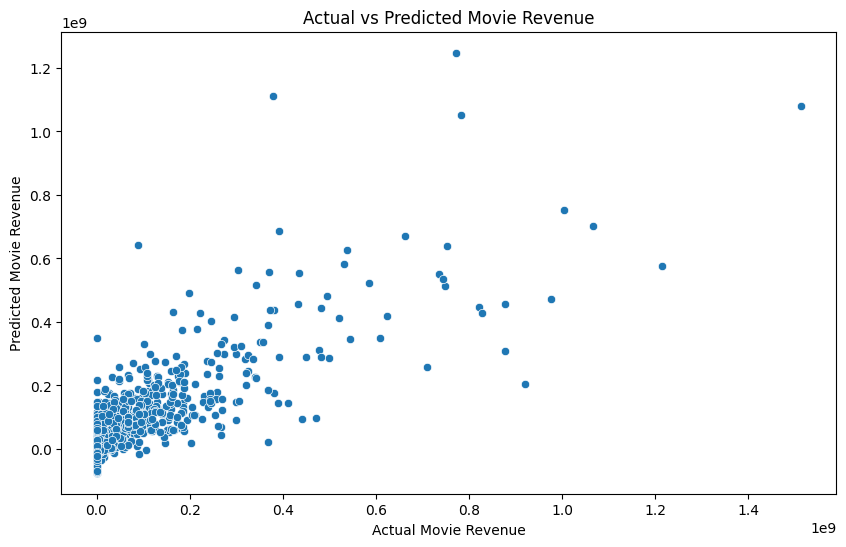

In [38]:
# Assuming the genre information is in a column named 'genre'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Movie Revenue')
plt.ylabel('Predicted Movie Revenue')
plt.title('Actual vs Predicted Movie Revenue')
plt.show()



## **Data Preprocessing**

In [30]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


## **Define Target Variable (y) and Feature Variables (X)**

In [31]:
y = df['Movie_Revenue']
X = df[['Movie_Budget', 'Movie_Popularity', 'Movie_Runtime', 'Movie_Vote']]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

## **Train Test Split**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [33]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## **Model Evaluation**

In [37]:


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 8571582620592913.0
R-squared: 0.6396686299074889


## **Prediction**

In [36]:
y_pred = model.predict(X_test)







## **Explaination**

This code snippet is part of a movie recommendation system project aimed at predicting movie revenues based on various features. The prediction of movie revenues is an important aspect as it helps in understanding the potential success of a movie, which can influence recommendations for users based on popular and high-revenue movies. Here is a detailed explanation of each step:

-We start by importing essential libraries for data manipulation, visualization, model training, and evaluation. pandas is used for data handling, matplotlib and seaborn for visualization, and sklearn for machine learning tasks.
-The dataset containing movie information is loaded from a CSV file into a pandas DataFrame.
-We define the target variable (y) as Movie_Revenue, which we aim to predict. The feature variables (X) include Movie_Budget, Movie_Popularity, Movie_Runtime, and Movie_Vote. These features are selected based on their potential impact on movie revenue.
-Missing values in the feature variables are handled using a SimpleImputer. We use the mean of each column to fill in missing values, ensuring that the dataset is complete and ready for model training.
-The dataset is split into training and testing sets using an 80-20 split. This allows us to train the model on one part of the data and test its performance on another, ensuring a robust evaluation.
-A linear regression model is defined and trained on the training data. This model learns the relationship between the feature variables and the target variable.
-The trained model is used to make predictions on the test set, providing an estimate of the movie revenues for the test data.
-The model's performance is evaluated using the Mean Squared Error (MSE) and R-squared (R²) metrics. MSE measures the average squared difference between the actual and predicted values, while R² indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
-A scatter plot is created to visualize the actual vs predicted movie revenues, allowing us to visually assess the model's performance.
